1. **Histogram Computation:** Compute the histogram of the image coins.png, by finding the frequency of pixels for each intensity level {0, 1, . . . , 255}. Show the histogram by plotting frequencies
w.r.t. intensity levels. Comment on what you observe. Also, find the average intensity of the image
using this histogram. Verify the result with the actual average intensity.

**Function Histogram**

**Input:**     Grayscale image

**Output:** Frequencies at each intensity
level ((a list/vector of size 256))

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import skimage
from skimage import io
import sys
import time

In [2]:
def get_hist(img, prob):
  img_matrix = np.round(io.imread(img))
  mn = img_matrix.shape
  histo = [float(0)]*256
  #Going through the whole image
  for i in range (0,mn[0],1):
    for j in range (0,mn[1],1):
      x = img_matrix[i][j]
      if(prob): histo[x] += 1/mn[0]/mn[1]
      else: histo[x]+=1

  return histo

def show_histo(hist):
  #code for bar plot
  x = np.zeros(256, dtype=int)
  for i in range (0, 255, 1):
    x[i] = i
  plt.bar(x, hist, color ='maroon', width = 0.4)
  plt.xlabel("grayscale intensity")
  plt.ylabel("frequency")
  plt.title("plot using get_hist function")
  plt.show()

time taken= 0.9167625904083252
Average calculted from histogram = 134.52717244238826
Average calculted over all pixel = 134.52717244238826


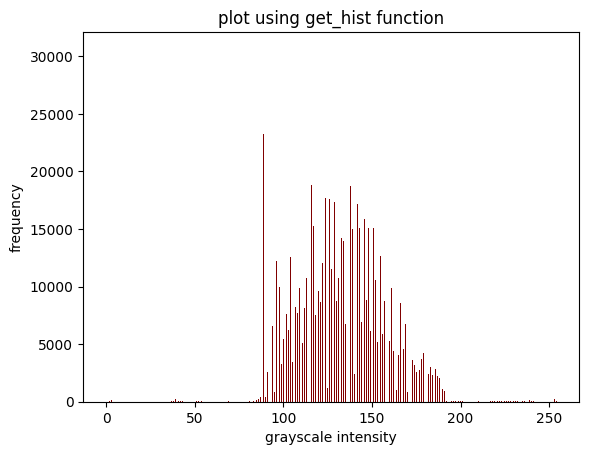

In [3]:
t = time . time ()
img_histo=get_hist("/content/Characters.png", False)
img_m = np.round(io.imread("/content/Characters.png"))
mn = img_m.shape

# calculate average using histogram
count = 0
avg =0
tot = 0
for x in img_histo:
  tot += x
  avg += x*count
  count += 1

# calculate average using image matrix
actual_avg = 0
for i in range (0,mn[0],1):
  for j in range (0,mn[1],1):
    actual_avg += img_m[i][j]

actual_avg = actual_avg/mn[0]/mn[1]
avg = avg/tot
print("time taken=", time . time () - t )
print("Average calculted from histogram =",avg)
print("Average calculted over all pixel =", actual_avg)
show_histo(img_histo)

2. **Otsu’s Binarization:** In the class, we showed that σ 2 w (t) + σ 2 b (t) = σ 2 T, where t is the threshold
for binarization. Binarize the image coins.png by finding the optimal threshold t by:

(a) Minimizing the within class variance
σ2w(t) over t.

(b) Maximizing the between class variance σ2b(t) over t.

Verify that both methods are equivalent. Compare the time taken by each of the approaches.

**Function** Within class variance

**Input** Grayscale image, threshold

**Output** Within class variance

**Function** Between class variance

**Input** Grayscale image, threshold

**Output** Between class variance


In [4]:

def binarize_img(img, th):
  for i in range (0, img.shape[0], 1):
    for j in range (0, img.shape[1], 1):
      if (img[i][j]>th): img[i][j]=255
      else: img[i][j]=0
  return img

def image_bet_var(img):
  img_matrix = np.round(io.imread(img))
  bins = 256
  p = get_hist(img, True)
  mn = img_matrix.shape
  sigB= np.zeros(256,dtype=float)
  sigB_max=0
  th_B =0
  clk = time.time()

  # loop scanning all threshold values, to find min or max
  for t in range (0, bins, 1):

    # initializing loopwise variables
    w0=0
    w1=0
    mu0=0
    mu1=0
    muT=0
    sig0=0
    sig1=0

    # loop calc w0, w1, mu0, mu1, muT
    for x in range (0, bins, 1):
      if (x<=t):                          # (0 - t)mean calculation for class 0
        w0 += p[x]
        mu0 += x*p[x]
      else:                               # (t+1 - k-1)mean calculation for class 0
        w1 += p[x]
        mu1 += x*p[x]
    if(w0!=0): mu0 = mu0/w0               # Avoiding w0=0 case
    else: mu0=0
    if(w1!=0): mu1 = mu1/w1               # Avoiding w1=0 case
    else: mu1=0

    # calculating muT (using mu0, mu1, w0, w1)
    mut = mu0*w0 + mu1*w1

    # loop calc sig0, sig1
    for x in range (0, bins, 1):
      if (x<=t):
        sig0 += p[x]*(x-mu0)**2           # (0 - t)variance calculation for class 0
      else:
        sig1 += p[x]*(x-mu1)**2           # (t+1 - k-1)variance calculation for class 1

    if(w0!=0): sig0 = sig0/w0             # Avoiding w0=0 case
    else: sig0=0
    if(w1!=0): sig1 = sig1/w1             # Avoiding w1=0 case
    else: sig1=0

    sigB[t] = float(w1*w0*(mu0-mu1)**2)   # calculating between class variance

    if (sigB_max<sigB[t]):
      sigB_max= sigB[t]
      th_B = t


  return binarize_img(img_matrix, th_B), th_B, sigB_max

def image_wi_var(img):
  img_matrix = np.round(io.imread(img))
  bins = 256
  p = get_hist(img, True)
  mn = img_matrix.shape
  sigW= np.zeros(256,dtype=float)
  sigW_min=999999999
  th_W =0
  clk = time.time()

  # loop scanning all threshold values, to find min or max
  for t in range (0, bins, 1):

    # initializing loopwise variables
    w0=0
    w1=0
    mu0=0
    mu1=0
    muT=0
    sig0=0
    sig1=0

    # loop calc w0, w1, mu0, mu1, muT
    for x in range (0, bins, 1):
      if (x<=t):                          # (0 - t)mean calculation for class 0
        w0 += p[x]
        mu0 += x*p[x]
      else:                               # (t+1 - k-1)mean calculation for class 0
        w1 += p[x]
        mu1 += x*p[x]
    if(w0!=0): mu0 = mu0/w0               # Avoiding w0=0 case
    else: mu0=0
    if(w1!=0): mu1 = mu1/w1               # Avoiding w1=0 case
    else: mu1=0

    # calculating muT (using mu0, mu1, w0, w1)
    mut = mu0*w0 + mu1*w1

    # loop calc sig0, sig1
    for x in range (0, bins, 1):
      if (x<=t):
        sig0 += p[x]*(x-mu0)**2           # (0 - t)variance calculation for class 0
      else:
        sig1 += p[x]*(x-mu1)**2           # (t+1 - k-1)variance calculation for class 1

    if(w0!=0): sig0 = sig0/w0             # Avoiding w0=0 case
    else: sig0=0
    if(w1!=0): sig1 = sig1/w1             # Avoiding w1=0 case
    else: sig1=0

    sigW[t] = float(sig0*w0 + sig1*w1)    # calculating within class variance

    if (sigW_min>sigW[t]):
      sigW_min= sigW[t]
      th_W = t

  return binarize_img(img_matrix, th_W), th_W, sigW_min

In [5]:
t = time . time ()
image_bw_info =  image_bet_var("/content/Characters.png")
print("time taken for between variance calculation =", time . time () - t )

t = time . time ()
image_wi_info =  image_wi_var("/content/Characters.png")
print("time taken for within variance calculation =", time . time () - t )

print("variance between class =", image_bw_info[2])
print("theshold for max between class variance =", image_bw_info[1])
print("variance within class =", image_wi_info[2])
print("theshold for min within class variance =", image_wi_info[1])
# plt.subplot(2, 2, 1)
# plt.axis("off")
# plt.imshow(np.round(io.imread("/content/coins.png")), cmap="gray")
# plt.subplot(2, 2, 2)
# plt.axis("off")
# plt.imshow(image_bw_info[0], cmap = "gray")
# plt.subplot(2, 2, 3)
# plt.axis("off")
# plt.imshow(image_wi_info[0], cmap = "gray")

time taken for between variance calculation = 3.170114517211914
time taken for within variance calculation = 2.355691909790039
variance between class = 919.1818196906011
theshold for max between class variance = 149
variance within class = 1098.4197202495202
theshold for min within class variance = 149


3. **Depth based Extraction:** The image IIScTextDepth.png is an inverse depth map of IIScText.png.
A depth map indicates the depth of an object from the camera for each pixel. Particularly,
an inverse depth map has a higher value when the object is nearer to the camera and a lower
value when it is farther apart. Binarize the inverse depth map IIScTextDepth.png and use
that information to extract the text in IIScText.png and display it over the background image
IIScMainBuilding.png. The expected image is shown below.

**Function** Image superimpose

**Input:** Text image, depth image, background image

**Output:** An image with the text superimposed on the background image

In [6]:
def superimp(txt, depth, bg):
  depth_matrix = image_wi_var(depth)[0]
  txt_matrix = np.round(io.imread(txt))
  bg_matrix = np.round(io.imread(bg))
  plt.imshow(depth_matrix, cmap = "gray")
  mn = depth_matrix.shape
  for x in range (0, mn[0], 1):
    for y in range (0, mn[1], 1):
      if (depth_matrix[x][y]==255):
        bg_matrix[x][y] = txt_matrix[x][y]
  return bg_matrix

time taken= 1.2719535827636719


<ipython-input-7-9d86c2323499>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 1)


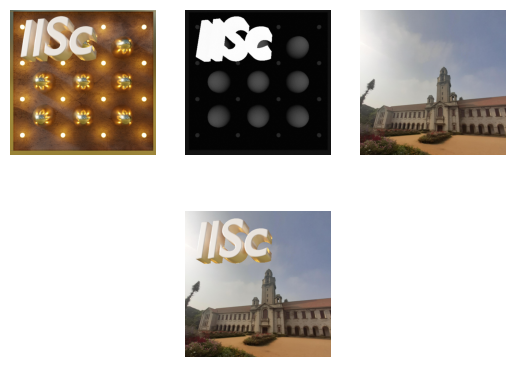

In [7]:
t = time . time ()
txt= "/content/IIScText.png"
depth= "/content/IIScTextDepth.png"
bg = "/content/IIScMainBuilding.png"
out_img = superimp(txt, depth, bg)
print("time taken=", time . time () - t )

plt.subplot(2, 3, 1)
plt.axis("off")
plt.imshow(np.round(io.imread(txt)), cmap="gray")
plt.subplot(2, 3, 2)
plt.axis("off")
plt.imshow(np.round(io.imread(depth)), cmap = "gray")
plt.subplot(2, 3, 3)
plt.axis("off")
plt.imshow(np.round(io.imread(bg)), cmap = "gray")
plt.subplot(2, 3, 5)
plt.axis("off")
plt.imshow(out_img, cmap = "gray")

4. **Connected Components:** Binarize the image quote.png and count the total number of characters excluding punctuations using connected component analysis.
**Function :** Count characters

**Input :** Image

**Output :** Number of characters

In [8]:
def update_region(c, r_lst, x, y, r1, r2, cond):

  # if cond (variable) True the two unconnected regions might have been found
  if(cond):
    ptr=0
    for a in r_lst:                 # Scanning list to find r1 belong to which set
      if r1 in a:                   # if r2 found in a set 'a'
        for b in r_lst:             # Scanning list to find r1 belong to which set
          if r2 in b:
            if(a==b): break         # if r1 and r1 already belong to same set 'a'
            a.update(b)             # else update the set 'a' to 'a(or)b'
            r_lst.remove(b)         # Remove 'b'
            break
        break
      ptr += 1

  # else there is a new region
  else: r_lst.append({c})


def nos(num_img):
  count = 1
  r = np.zeros(num_img.shape, dtype=int)
  r_lst = []

  #Making region matrix r[][], and taking account of connected regions in r_lst = [{},{},...]

  #Looping in the image, scanning black pixels
  for i in range (0, num_img.shape[0], 1):
    for j in range (0, num_img.shape[1], 1):

      if (num_img[i][j]==0 and i>0 and j>0):

        #      --
        #      --
        #   -- ##
        #   -- ##

        if (num_img[i-1][j]== 0):

          #      ##
          #      ##
          #   -- ##       //connected region
          #   -- ##       //update r[i][j] as r[i-1][j]

          r[i][j] = r[i-1][j]

          if (num_img[i][j-1]==0):

            #      ##
            #      ##
            #   ## ##       //connected region
            #   ## ##       //check adjecent region connected(?)...

            if(r[i-1][j]!=r[i][j-1]):

              #             //if true update r_lst, replace r[i][j-1] to r[i-1][j]

              update_region(0, r_lst, i, j, r[i][j-1], r[i-1][j], True)
              r[i][j-1] = r[i-1][j]

        if (num_img[i][j-1]==0 and num_img[i-1][j]!=0):

          #      XX
          #      XX
          #   ## ##     //connected region
          #   ## ##     //update only region matrix r[i][j]

          r[i][j] = r[i][j-1]

        if (num_img[i][j-1]!=0 and num_img[i-1][j]!=0):

          #      XX
          #      XX
          #   XX ##     // Found new region
          #   XX ##     // update the r_lst, region matrix r[i][j], count(+1)

          update_region(count, r_lst, i, j, 0, 0, False)
          r[i][j] = count
          count += 1

  # Calculating height of all the pixels in the seperate regions.

  ht = np.full(len(r_lst), num_img.shape[0])
  pxl = np.zeros(len(r_lst), dtype=int)
  for i in range (0, num_img.shape[0], 1):
    for j in range (0, num_img.shape[1], 1):
      ptr=0
      for x in r_lst:
        if r[i][j] in x:
          if (ht[ptr]>i): ht[ptr]=i
          pxl[ptr] = i -ht[ptr]
        ptr+=1

  print("length of list = ",len(r_lst))
  print("height of all regions =", pxl)

  # No. of letters are the ones which are greater than the mean.
  avg = np.average(pxl)

  print("Average height of pixels = ", avg)
  # No. of pixels greater than mean.
  ltrs = (pxl > avg).sum()
  print("no. of letters in Image = ", ltrs)
  return ltrs, r, r_lst

def find_region(img, otsu, th):

  if (otsu):
    img_info = image_wi_var(img)
    bin_img = img_info[0]
  else: pass
  x = nos(bin_img)
  return x


In [9]:
t = time . time ()
img = "/content/quote.png"
info = find_region(img, True, 0)
print("time taken=", time . time () - t )


length of list =  67
height of all regions = [36 36 36 36 36 36 36 36 35 36 35 35 36 35 36 37 37 13 36 36 36 36 36 36
 36 36 36 36 36 37 37 37 37 35 13 36 36 36 36 36 36 36 36 36 36 36 36 37
 36 37 36 36 36 36 36 36 35 36 35 35 35 36 35 37 35  5 35]
Average height of pixels =  34.80597014925373
no. of letters in Image =  64
time taken= 12.192372798919678


5. **Optional Bonus Question - MSER:** Maximally Stable Extremal Regions (MSER) correspond
to regions of connected components which, when thresholded around a certain threshold, are stable
in terms of the size of the component.

**Function:** MSER

**Input:** Image

**Output:** Number of characters

In [10]:
import time
def find_region_MSER(img, th):
  bin_img = binarize_img_MSER(img, th)      #bin_img[0]->binarized image
                                            #bin_img[1]->mejority pixel black or white
  img = bin_img[0]
  blk = bin_img[1]
  x = nos_MSER(img, blk)
  return x

# def mejority(img):


def binarize_img_MSER(img, th):

  # calculating mejority pixel intensity
  blk = 0
  w =0
  print(th)
  # binarizing image
  mn = img.shape
  for i in range (int(0.3*mn[0]), int(0.7*mn[0]), 1):
    for j in range (int(0.1*mn[1]), int(0.9*mn[1]), 1):
      if (img[i][j]>th):
        img[i][j]=255
        w+=1
      else:
        img[i][j]=0
        blk+=1

  # mejority pixels
  if(blk>w): blk = False
  else: blk = True
  return img, blk

def update_region_MSER(c, r_lst, x, y, r1, r2, cond):

  # if cond (variable) True the two unconnected regions might have been found
  if(cond):
    ptr=0
    for a in r_lst:                 # Scanning list to find r1 belong to which set
      if r1 in a:                   # if r2 found in a set 'a'
        if r2 in a: break           # if r1 and r2 belong to same set 'a', then break
        for b in r_lst:             # Scanning list to find r1 belong to which set
          if r2 in b:
            a.update(b)             # else update the set 'a' to 'a(or)b'
            r_lst.remove(b)         # Remove 'b'
            break
        break
      ptr += 1

  # else there is a new region
  else: r_lst.append({c})


def nos_MSER(num_img, blk):
  count = 1
  r = np.zeros(num_img.shape, dtype=int)
  r_lst = []

  colr = 255
  if(blk): colr = 0
  # Making region matrix r[][], and taking account of connected regions in r_lst = [{},{},...]
  mn = num_img.shape
  for i in range (int(0.3*mn[0]), int(0.7*mn[0]), 1):
    for j in range (int(0.1*mn[1]), int(0.9*mn[1]), 1):
      if (num_img[i][j]== colr and i>0 and j>0):
        if (num_img[i-1][j]== colr):
          r[i][j] = r[i-1][j]
          if (num_img[i][j-1]==colr):
            if(r[i-1][j]!=r[i][j-1]):
              # print("log: found 2 existing region")
              update_region_MSER(0, r_lst, i, j, r[i][j-1], r[i-1][j], True)
              r[i][j-1] = r[i-1][j]
        if (num_img[i][j-1]==colr and num_img[i-1][j]!=colr):
          r[i][j] = r[i][j-1]
        if (num_img[i][j-1]!=colr and num_img[i-1][j]!=colr):
          update_region_MSER(count, r_lst, i, j, 0, 0, False)
          r[i][j] = count
          count += 1

  lent = len(r_lst)

  # if (lent>5): return 0

  # Calculating height of all the pixels in the seperate regions.
  ht_f = np.full(lent, mn[0])
  pxl_ht = np.zeros(lent, dtype=int)

  # Calculating width of all the pixels in the seperate regions.
  wd_f = np.full(lent, mn[1])
  pxl_wd = np.zeros(lent, dtype=int)

  # Calculting no of pixels
  pxls = np.zeros(lent, dtype=int)

  for i in range (int(0.3*mn[0]), int(0.7*mn[0]), 1):
    for j in range (int(0.1*mn[1]), int(0.9*mn[1]), 1):
      ptr=0
      for x in r_lst:
        if r[i][j] in x:
          pxls[ptr] +=1
          if (wd_f[ptr]>j): wd_f[ptr]=j
          pxl_wd[ptr] = j - wd_f[ptr]

          if (ht_f[ptr]>i): ht_f[ptr]=i
          pxl_ht[ptr] = i -ht_f[ptr]
        if pxl_ht[ptr]>200 or pxl_wd[ptr]>250:
          r_lst = np.delete(r_lst, ptr, axis=0)
          pxls = np.delete(pxls, ptr)
          pxl_ht = np.delete(pxl_ht, ptr)
          pxl_wd = np.delete(pxl_wd, ptr)
          continue
        ptr+=1

  # calculating region information


  r_info = np.zeros((len(r_lst), 4), int)   # rgn_info[,0] & rgn_info[,1]-->center point of region
                                            # rgn_info[,2]-->hight of region and rgn_info[,3]-->width of region
                                            # rgn_info[,4]-->no.of pixels
  ptr=0
  for x in r_info:

    # (d) Ignore extremely large or extremely small connected components in the analysis.
    if pxls[ptr]<10000 or pxl_ht[ptr]<50 or pxl_ht[ptr]>200 or pxl_wd[ptr]<25 or pxl_wd[ptr]>250:
      r_info = np.delete(r_info, ptr, axis=0)
      pxls = np.delete(pxls, ptr)
      pxl_ht = np.delete(pxl_ht, ptr)
      pxl_wd = np.delete(pxl_wd, ptr)
      continue
    codx = wd_f[ptr]+int(pxl_wd[ptr]/2)
    cody = ht_f[ptr]+int(pxl_ht[ptr]/2)
    r_info[ptr][0] = codx
    r_info[ptr][1] = cody
    r_info[ptr][2] = pxl_ht[ptr]
    r_info[ptr][3] = pxl_wd[ptr]
    ptr+=1

  return r_info



In [11]:
def MSER(img):

  info = np.empty((0, 4), int)
  count = np.empty((0), int)
  inc = 5
  tol = 10
  # (a) Sweep over all thresholds.
  for t in range (0, 255, inc):
    # (b) For each threshold, determine connected components in the image.
    img_m = np.round(io.imread(img))
    img_info = find_region_MSER(img_m, t)

    # (c) A connected component is termed an MSER if the size of the component does not change
    #     much (within "tol= 10") for a small perturbation "inc= (5-10)" in the choice of the threshold.
    #     Determination of the stable threshold for each connected component.
    if(isinstance(img_info, np.ndarray)):
      for x in img_info:
        prsnt = False
        ptr = 0
        for y in info:
          if(np.allclose(x, y, atol=tol)):
            count[ptr]+=inc
            prsnt = True
            break
          if(prsnt): break
          ptr+=1
        if(prsnt==False):
          info = np.append(info, [x], axis = 0)
          count = np.append(count, [0])

  return info, count, inc


In [12]:
t = time . time ()
info = MSER("/content/Characters.png")
print("info of image- format:-[[jth element of marix, ith element of marix, height, width]]")
print(info[0])
print("stablity array")
print(info[1])
print("increments in binarization threshold value = ", info[2])
print("Number of stable regions = ",np.sum(info[1] > 5))
print("time taken = ", time . time () - t )

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
info of image- format:-[[jth element of marix, ith element of marix, height, width]]
[[1029  350  187  157]
 [ 209  350  187   56]
 [ 613  350  187  203]
 [1218  308  189  158]
 [1244  338  187  204]
 [1220  420  187  204]
 [1182  400  188  204]
 [ 157  308  189   58]
 [ 241  325  188  204]
 [1025  308  188  204]
 [ 230  289  151  204]
 [ 385  350  189  211]
 [ 723  404  195  104]
 [ 773  350  195  100]
 [ 782  350  194  118]]
stablity array
[110 100  15   0   0   0   0   0   0   0   0  65   0   5  35]
increments in binarization threshold value =  5
Number of stable regions =  5
time taken =  162.6047830581665
